# Masterclass Qiskit — 03 • Cas pratiques (Deutsch‑Jozsa)

Objectifs (≈45–60 min) :
- Implémenter Deutsch‑Jozsa avec 3–4 qubits (fonction constante vs équilibrée).
- Réaliser la téléportation d'un qubit arbitraire.
- Lancer une recherche de Grover sur 3 qubits avec 1 état marqué.

## 1. Deutsch‑Jozsa (DJ) — rappel rapide

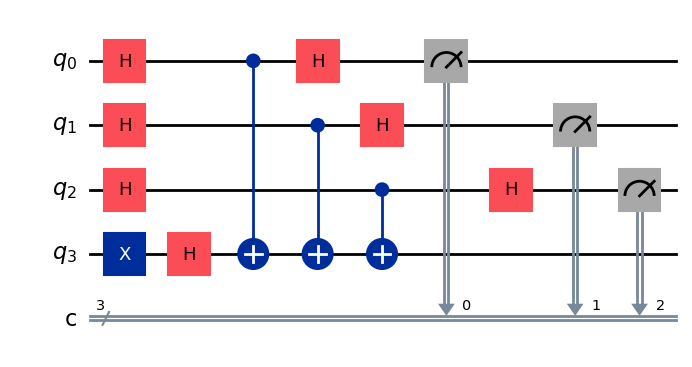

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def dj_oracle_balanced(n):
    # Exemple simple: XOR de tous les bits
    oracle = QuantumCircuit(n+1)  # n inputs + 1 ancilla
    for i in range(n):
        oracle.cx(i, n)
    return oracle

def dj_oracle_constant(n, value=0):
    oracle = QuantumCircuit(n+1)
    if value == 1:
        oracle.x(n)  # flip constant 1
    return oracle

def deutsch_jozsa(n=3, balanced=True):
    x = QuantumCircuit(n+1, n)
    # init ancilla to |1> and H to all
    x.x(n); x.h(range(n+1))
    # oracle
    oracle = dj_oracle_balanced(n) if balanced else dj_oracle_constant(n, value=0)
    x.compose(oracle, range(n+1), inplace=True)
    # H on inputs
    x.h(range(n))
    # measure inputs
    x.measure(range(n), range(n))
    return x

dj_bal = deutsch_jozsa(n=3, balanced=True)
dj_con = deutsch_jozsa(n=3, balanced=False)
dj_bal.draw('mpl')

Balanced: {'111': 2048}
Constant: {'000': 2048}


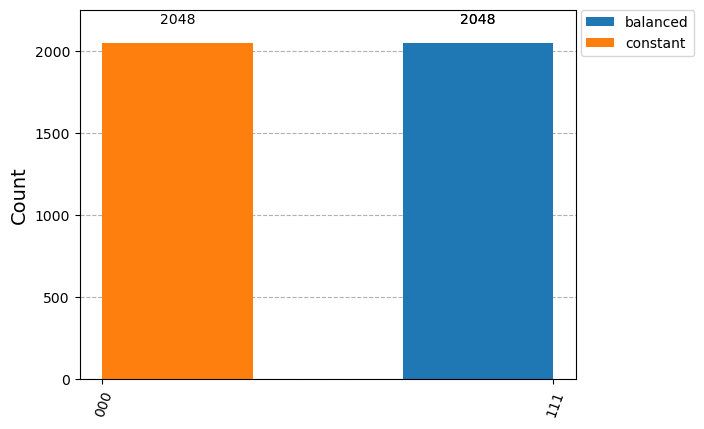

In [3]:
backend = Aer.get_backend('qasm_simulator')
counts_bal = backend.run(dj_bal, shots=2048).result().get_counts()
counts_con = backend.run(dj_con, shots=2048).result().get_counts()
print("Balanced:", counts_bal)
print("Constant:", counts_con)
plot_histogram([counts_bal, counts_con], legend=['balanced','constant'])

## 4. Exercice
DJ avec n=4 et une autre fonction équilibrée (parité des deux premiers bits).

In [ ]:
# Zone de réponse : à compléter par les apprenants